# Code Refactoring

### Project Components
1. Dataset collection
2. Dataset analysis
3. Model training
4. Hyperparameter tuning
5. Model evaluation
6. Error analysis
7. Model analysis

### Dataset Collection

In [2]:
from dataset_collection import *

In [2]:
ad = get_all_datasets()

Files already downloaded and verified
Files already downloaded and verified
Saved dataset at 'dataset/cifar/cifar.npy'.
Loaded dataset at 'dataset/quickdraw/quickdraw.npy'.
Loaded dataset at 'dataset/sketchy/sketchy_real.npy'.
Loaded dataset at 'dataset/sketchy/sketchy_doodle.npy'.
Loaded dataset at 'dataset/tuberlin/tuberlin.npy'.
Loaded dataset at 'dataset/google_images/google_doodles.npy'.
Loaded dataset at 'dataset/google_images/google_real.npy'.


In [14]:
dd = get_doodle_datasets()

Loaded dataset at 'dataset/quickdraw/quickdraw.npy'.
Loaded dataset at 'dataset/sketchy/sketchy_doodle.npy'.
Loaded dataset at 'dataset/tuberlin/tuberlin.npy'.
Loaded dataset at 'dataset/google_images/google_doodles.npy'.


In [15]:
rd = get_real_datasets()

Loaded dataset at 'dataset/cifar/cifar.npy'.
Loaded dataset at 'dataset/sketchy/sketchy_real.npy'.
Loaded dataset at 'dataset/google_images/google_real.npy'.


In [16]:
cdd = collapse_datasets(dd)
crd = collapse_datasets(rd)

In [17]:
sketchy_pairs = get_sketchy_pairs()

Loaded dataset at 'dataset/sketchy/sketchy_pairs.npy'.


### Dataset Analysis

In [18]:
from dataset_analysis import *

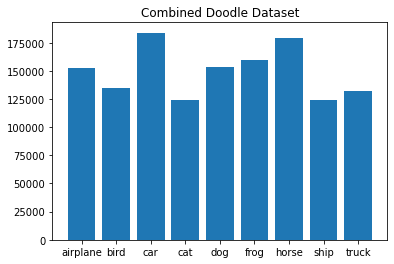

In [32]:
plot_dataset_dist(cdd, "Combined Doodle Dataset")

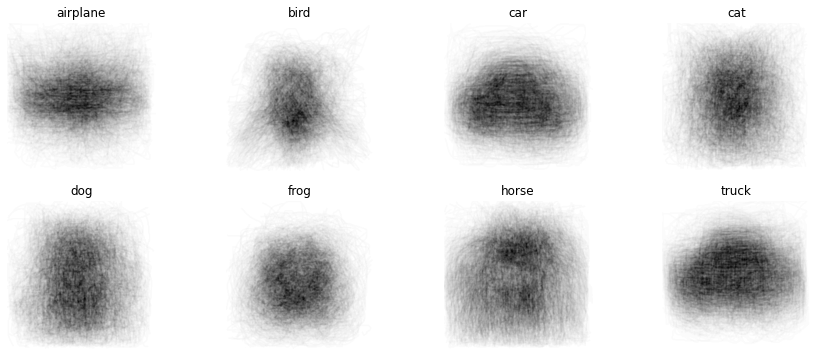

In [31]:
plot_dataset_mean(dd['sketchy_doodle'])

### Model Training

In [1]:
from model_training import *

In [33]:
doodle_dataloader = DataLoader(DoodleDataset(), batch_size=32, shuffle=True)
for batch, (x, y) in enumerate(doodle_dataloader):
    print(x.shape, y)
    break

Loaded dataset at 'dataset/sketchy/sketchy_doodle.npy'.
Loaded dataset at 'dataset/tuberlin/tuberlin.npy'.
Loaded dataset at 'dataset/google_images/google_doodles.npy'.
torch.Size([32, 1, 64, 64]) tensor([4, 3, 6, 4, 4, 6, 4, 3, 0, 0, 2, 4, 4, 3, 4, 3, 3, 2, 0, 2, 8, 5, 6, 2,
        2, 1, 6, 5, 1, 0, 0, 8], dtype=torch.int32)


In [35]:
contrastive_dataloader = DataLoader(ContrastiveDataset(), batch_size=32, shuffle=True)
for batch, (x1, y1, x2, y2) in enumerate(contrastive_dataloader):
    print(x1.shape, y1, x2.shape, y2)
    break

Loaded dataset at 'dataset/sketchy/sketchy_doodle.npy'.
Loaded dataset at 'dataset/tuberlin/tuberlin.npy'.
Loaded dataset at 'dataset/google_images/google_doodles.npy'.
Loaded dataset at 'dataset/cifar/cifar.npy'.
Loaded dataset at 'dataset/sketchy/sketchy_real.npy'.
Loaded dataset at 'dataset/google_images/google_real.npy'.
torch.Size([32, 64, 64]) tensor([8, 4, 0, 1, 8, 7, 6, 6, 7, 7, 4, 8, 0, 4, 2, 6, 1, 6, 4, 3, 7, 1, 3, 2,
        1, 4, 6, 7, 2, 6, 3, 1]) torch.Size([32, 64, 64, 3]) tensor([8, 4, 0, 1, 8, 7, 6, 6, 7, 7, 4, 8, 0, 4, 2, 6, 1, 6, 4, 3, 7, 1, 3, 2,
        1, 4, 6, 7, 2, 6, 3, 1])


### Hyperparameter Tuning

### Model Evaluation

In [1]:
from model_evaluation import *
from models import *

In [33]:
def evaluate_model(model, model_dir, dataset):
    dl = DataLoader(d, batch_size=32, shuffle=False)
    model = load_model(model, model_dir).eval()
    acc = AverageMeter()
    with torch.no_grad():
        for i, (x, y) in enumerate(dl):
            preds, feats = model(x, return_feats=True)
            acc.update(compute_accuracy(preds, y))
    return acc.avg

In [13]:
evaluate_model(DoodleMLP(64*64, 128, 9, dropout=0.2), "mlp_trained/14_model1.pt", DoodleDataset())

Loaded dataset at 'dataset/sketchy/sketchy_doodle.npy'.
Loaded dataset at 'dataset/tuberlin/tuberlin.npy'.
Loaded dataset at 'dataset/google_images/google_doodles.npy'.
Loaded model from: mlp_trained/14_model1.pt


0.11363636363636363

In [34]:
evaluate_model(RealMLP(64*64*3, 512, 9, dropout=0.2), "mlp_trained/14_model2.pt", RealDataset())

Loaded dataset at 'dataset/cifar/cifar.npy'.
Loaded dataset at 'dataset/sketchy/sketchy_real.npy'.
Loaded dataset at 'dataset/google_images/google_real.npy'.
Loaded model from: mlp_trained/14_model2.pt


0.12031519241815049